First we need to import the appropriate libraries that will be used within this dataframe notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We then read the dataframe itself and look at the top 10 rows to get an idea of what the dataframe is representing.

In [2]:
df_250_countries = pd.read_csv("D:/GUC/Semester9/DE/Data/250 Country Data.csv")
df_250_countries.head(10)

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN
5,5,Andorra,Europe,Southern Europe,78014,468.0,NaN,-1.6%.,100%,1.1%.,4% (2012 est.).
6,6,Angola,Africa,Middle Africa,25868000,1246700.0,58.6,5.6%.,70.4% (2011 est.),8.9%.,n.a.
7,7,Anguilla,Americas,Caribbean,13452,91.0,NaN,2.8%.,NaN,3.1% (2013).,8% (2002).
8,8,Antarctica,Polar,NaN,1000,14000000.0,NaN,NaN,NaN,NaN,NaN
9,9,Antigua and Barbuda,Americas,Caribbean,86295,442.0,NaN,1.7% (2012 est.).,99% (2011 est.),3% (2013 est.).,11% (2001 est.).


We notice that the there are multiple columns with missing values as well as multiple columns with more than one data type in their corresponding rows, so we get the information on the dataframe to see the data types and the number of the non-null values in each column.

In [3]:
print(df_250_countries.shape)
df_250_countries.info()

(250, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             250 non-null    int64  
 1   name                   250 non-null    object 
 2   region                 248 non-null    object 
 3   subregion              247 non-null    object 
 4   population             250 non-null    int64  
 5   area                   240 non-null    float64
 6   gini                   153 non-null    float64
 7   Real Growth Rating(%)  171 non-null    object 
 8   Literacy Rate(%)       176 non-null    object 
 9   Inflation(%)           168 non-null    object 
 10  Unemployement(%)       168 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 21.6+ KB


We correct the datatypes and format in the Real Growth Rating, Literacy Rate, Inflation, Unemployement columns by using regular expressions.

In [4]:
df_250_countries['Real Growth Rating(%)'] = df_250_countries['Real Growth Rating(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df_250_countries['Literacy Rate(%)'] = df_250_countries['Literacy Rate(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df_250_countries['Inflation(%)'] = df_250_countries['Inflation(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df_250_countries['Unemployement(%)'] = df_250_countries['Unemployement(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)

In [5]:
df_250_countries

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1,28.1,6.8,35.0
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.7,98.7,1.7,16.9
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1,79.0,3.9,10.3
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3.0,97.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,NaN,NaN,NaN,NaN,NaN
246,246,Western Sahara,Africa,Northern Africa,510713,266000.0,NaN,NaN,NaN,NaN,NaN
247,247,Yemen,Asia,Western Asia,27478000,527968.0,37.7,3.8,65.3,11.8,35.0
248,248,Zambia,Africa,Eastern Africa,15933883,752612.0,54.6,6.0,61.4,7.1,15.0


We remove the rows with an NaN value in their region column, there are only 2 such rows so the missing data is an acceptable loss.

In [6]:
df_250_countries[df_250_countries['region'].notna()]

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1,28.1,6.8,35.0
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.7,98.7,1.7,16.9
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1,79.0,3.9,10.3
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3.0,97.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,NaN,NaN,NaN,NaN,NaN
246,246,Western Sahara,Africa,Northern Africa,510713,266000.0,NaN,NaN,NaN,NaN,NaN
247,247,Yemen,Asia,Western Asia,27478000,527968.0,37.7,3.8,65.3,11.8,35.0
248,248,Zambia,Africa,Eastern Africa,15933883,752612.0,54.6,6.0,61.4,7.1,15.0


We then group the dataframe by the region column in order to better analyse data from a similar aspect.

In [7]:
regions_df = df_250_countries.groupby('region')

We check the number of unique regions within the dataframe in order to create sub-dataframes of each region. This will enable us to impute the missing values in each column with a more relevant dataframe for each set of imputations.

In [8]:
regions_df.region.unique()

region
Africa        [Africa]
Americas    [Americas]
Asia            [Asia]
Europe        [Europe]
Oceania      [Oceania]
Polar          [Polar]
Name: region, dtype: object

In [9]:
asia_region = regions_df.get_group('Asia')
europe_region = regions_df.get_group('Europe')
africa_region = regions_df.get_group('Africa')
oceania_region = regions_df.get_group('Oceania')
americas_region = regions_df.get_group('Americas')
polar_region = regions_df.get_group('Polar')

In [10]:
print(asia_region.shape)
asia_region.info()

(50, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 247
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50 non-null     int64  
 1   name                   50 non-null     object 
 2   region                 50 non-null     object 
 3   subregion              50 non-null     object 
 4   population             50 non-null     int64  
 5   area                   49 non-null     float64
 6   gini                   39 non-null     float64
 7   Real Growth Rating(%)  37 non-null     float64
 8   Literacy Rate(%)       38 non-null     float64
 9   Inflation(%)           37 non-null     float64
 10  Unemployement(%)       37 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.7+ KB


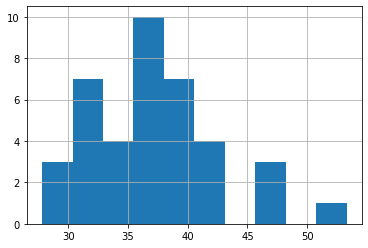

In [11]:
asia_region['gini'].hist()

In [12]:
asia_region['gini'].mode()

0    30.9
1    36.7
2    38.1
dtype: float64

In [13]:
asia_region.fillna({'gini':asia_region['gini'].mode().iloc[1]}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


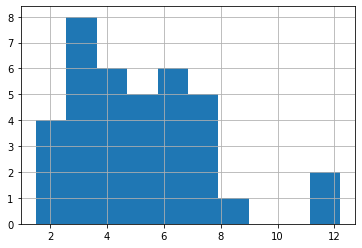

In [14]:
asia_region['Real Growth Rating(%)'].hist()

In [15]:
asia_region['Real Growth Rating(%)'].mode()

0    3.6
1    5.8
dtype: float64

In [16]:
asia_region.fillna({'Real Growth Rating(%)':asia_region['Real Growth Rating(%)'].mode().iloc[0]}, inplace=True)

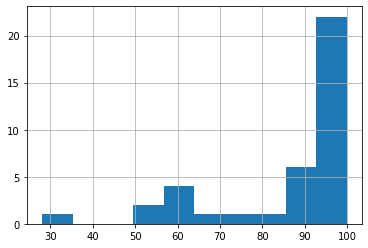

In [17]:
asia_region['Literacy Rate(%)'].hist()

In [18]:
asia_region['Literacy Rate(%)'].mode()

0    99.7
dtype: float64

In [19]:
asia_region.fillna({'Literacy Rate(%)':asia_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [20]:
asia_region['Inflation(%)'].mode()

0    2.2
1    3.7
2    6.8
3    7.6
4    7.7
dtype: float64

In [21]:
asia_region.fillna({'Inflation(%)':asia_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

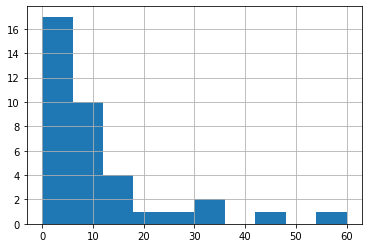

In [22]:
asia_region['Unemployement(%)'].hist()

In [23]:
asia_region['Unemployement(%)'].mode(dropna=True)

0     4.1
1     6.6
2    35.0
dtype: float64

In [24]:
asia_region.fillna({'Unemployement(%)':asia_region['Unemployement(%)'].mode().iloc[0]}, inplace = True)

In [25]:
asia_region.fillna({'area': 0}, inplace=True)

In [26]:
print(europe_region.shape)
europe_region.info()

(53, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 238
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             53 non-null     int64  
 1   name                   53 non-null     object 
 2   region                 53 non-null     object 
 3   subregion              53 non-null     object 
 4   population             53 non-null     int64  
 5   area                   52 non-null     float64
 6   gini                   37 non-null     float64
 7   Real Growth Rating(%)  38 non-null     float64
 8   Literacy Rate(%)       37 non-null     float64
 9   Inflation(%)           37 non-null     float64
 10  Unemployement(%)       37 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.0+ KB


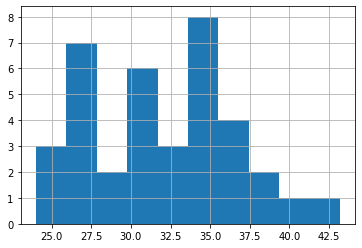

In [27]:
europe_region['gini'].hist()

In [28]:
asia_region['gini'].mean()

36.95

In [29]:
europe_region.fillna({'gini':europe_region['gini'].mean()}, inplace = True)

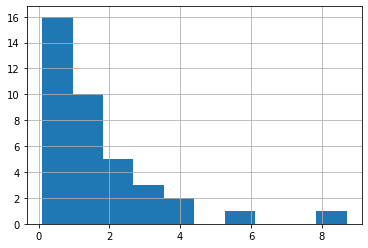

In [30]:
europe_region['Real Growth Rating(%)'].hist()

In [31]:
europe_region['Real Growth Rating(%)'].mode()

0    0.4
1    0.5
2    0.9
dtype: float64

In [32]:
europe_region.fillna({'Real Growth Rating(%)':europe_region['Real Growth Rating(%)'].mode().iloc[0]}, inplace = True)

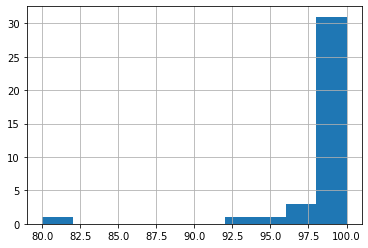

In [33]:
europe_region['Literacy Rate(%)'].hist()

In [34]:
europe_region['Literacy Rate(%)'].mode()

0    99.0
dtype: float64

In [35]:
europe_region.fillna({'Literacy Rate(%)':europe_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

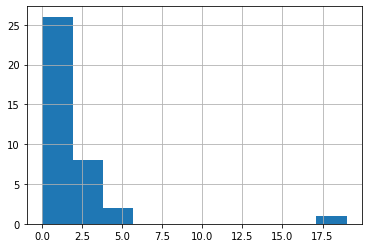

In [36]:
europe_region['Inflation(%)'].hist()

In [37]:
europe_region['Inflation(%)'].mode()

0    0.7
1    1.5
dtype: float64

In [38]:
europe_region.fillna({'Inflation(%)':europe_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

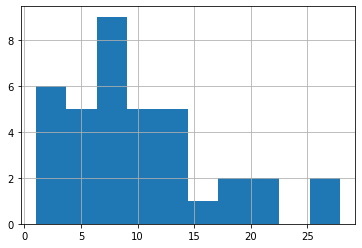

In [39]:
europe_region['Unemployement(%)'].hist()

In [40]:
europe_region['Unemployement(%)'].mean()

10.202702702702705

In [41]:
europe_region.fillna({'Unemployement(%)':europe_region['Unemployement(%)'].mean()}, inplace = True)

In [42]:
europe_region.fillna({'area':0}, inplace = True)

In [43]:
print(africa_region.shape)
africa_region.info()

(60, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 3 to 249
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60 non-null     int64  
 1   name                   60 non-null     object 
 2   region                 60 non-null     object 
 3   subregion              60 non-null     object 
 4   population             60 non-null     int64  
 5   area                   57 non-null     float64
 6   gini                   46 non-null     float64
 7   Real Growth Rating(%)  44 non-null     float64
 8   Literacy Rate(%)       48 non-null     float64
 9   Inflation(%)           41 non-null     float64
 10  Unemployement(%)       29 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.6+ KB


<ipython-input-44-3d0d22247a01>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  africa_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBFF36D040>,
      dtype=object)

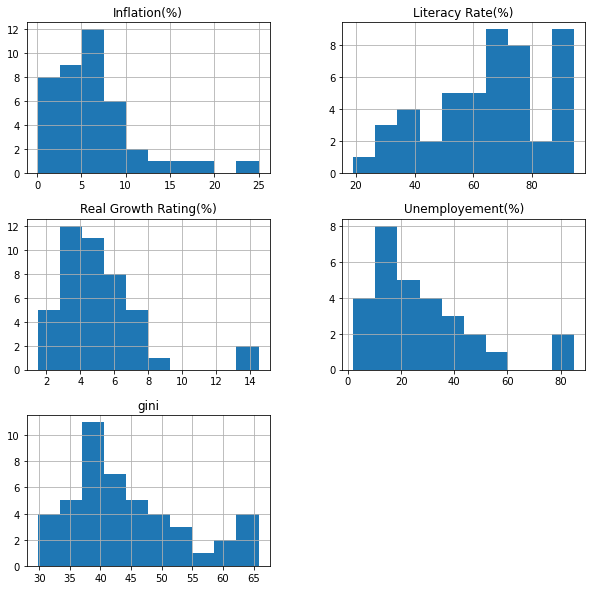

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
africa_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

In [45]:
africa_region['gini'].mode()

0    35.3
1    39.8
2    41.5
3    50.8
dtype: float64

In [46]:
africa_region.fillna({'gini':africa_region['gini'].mode().iloc[1]}, inplace = True)

In [47]:
africa_region['Real Growth Rating(%)'].mean()

5.165909090909091

In [48]:
africa_region.fillna({'Real Growth Rating(%)':africa_region['Real Growth Rating(%)'].mean()}, inplace = True)

In [49]:
africa_region['Literacy Rate(%)'].mode()

0    88.8
dtype: float64

In [50]:
africa_region.fillna({'Literacy Rate(%)':africa_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [51]:
africa_region['Inflation(%)'].mode()

0    5.8
1    6.1
2    7.0
3    7.1
dtype: float64

In [52]:
africa_region.fillna({'Inflation(%)':africa_region['Inflation(%)'].mode().iloc[1]}, inplace = True)

In [53]:
africa_region['Unemployement(%)'].mode()

0    30.0
dtype: float64

In [54]:
africa_region.fillna({'Unemployement(%)':africa_region['Unemployement(%)'].mode().iloc[0]}, inplace = True)

In [55]:
africa_region.fillna({'area':0}, inplace = True)

In [56]:
africa_region

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.100000,79.00,3.9,10.3
6,6,Angola,Africa,Middle Africa,25868000,1246700.0,58.6,5.600000,70.40,8.9,30.0
23,23,Benin,Africa,Western Africa,10653654,112622.0,38.6,5.000000,42.40,2.4,30.0
29,29,Botswana,Africa,Southern Africa,2141206,582000.0,61.0,3.900000,85.10,6.1,17.8
32,32,British Indian Ocean Territory,Africa,Eastern Africa,3000,60.0,39.8,5.165909,88.80,6.1,30.0
38,38,Burkina Faso,Africa,Western Africa,19034397,272967.0,39.8,6.500000,28.70,2.1,77.0
39,39,Burundi,Africa,Eastern Africa,10114505,27834.0,33.3,4.500000,67.20,9.3,30.0
41,41,Cameroon,Africa,Middle Africa,22709892,475442.0,38.9,4.600000,75.90,2.6,30.0
43,43,Cabo Verde,Africa,Western Africa,531239,4033.0,50.5,5.165909,88.80,6.1,30.0
45,45,Central African Republic,Africa,Middle Africa,4998000,622984.0,56.3,14.500000,56.60,7.0,8.0


In [57]:
print(oceania_region.shape)
oceania_region.info()

(27, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 4 to 245
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27 non-null     int64  
 1   name                   27 non-null     object 
 2   region                 27 non-null     object 
 3   subregion              27 non-null     object 
 4   population             27 non-null     int64  
 5   area                   27 non-null     float64
 6   gini                   4 non-null      float64
 7   Real Growth Rating(%)  14 non-null     float64
 8   Literacy Rate(%)       14 non-null     float64
 9   Inflation(%)           16 non-null     float64
 10  Unemployement(%)       13 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.5+ KB


<ipython-input-58-f88980d9145b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  oceania_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBFF7A6910>,
      dtype=object)

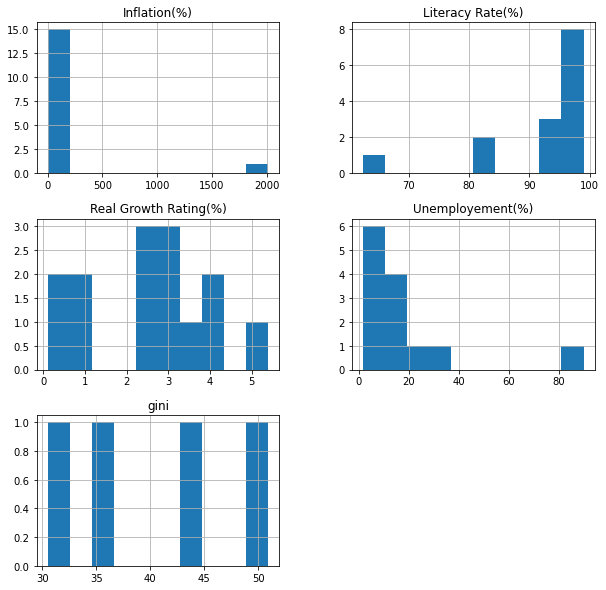

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
oceania_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

In [59]:
oceania_region['gini'].mean()

40.1

In [60]:
oceania_region.fillna({'gini':oceania_region['gini'].mean()}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [61]:
oceania_region['Real Growth Rating(%)'].mean()

2.564285714285714

In [62]:
oceania_region.fillna({'Real Growth Rating(%)':oceania_region['Real Growth Rating(%)'].mean()}, inplace = True)

In [63]:
oceania_region['Literacy Rate(%)'].mode()

0    99.0
dtype: float64

In [64]:
oceania_region.fillna({'Literacy Rate(%)':oceania_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [65]:
oceania_region['Inflation(%)'].mode()

0    2.7
1    3.8
dtype: float64

In [66]:
oceania_region.fillna({'Inflation(%)':oceania_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

In [67]:
oceania_region['Unemployement(%)'].mode()

0      1.70
1      1.90
2      2.00
3      5.70
4      6.43
5      7.60
6     11.20
7     11.40
8     13.00
9     17.10
10    21.80
11    36.00
12    90.00
dtype: float64

In [68]:
oceania_region.fillna({'Unemployement(%)':oceania_region['Unemployement(%)'].mode().iloc[0]}, inplace = True)

In [69]:
print(americas_region.shape)
americas_region.info()

(57, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 7 to 243
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             57 non-null     int64  
 1   name                   57 non-null     object 
 2   region                 57 non-null     object 
 3   subregion              57 non-null     object 
 4   population             57 non-null     int64  
 5   area                   52 non-null     float64
 6   gini                   27 non-null     float64
 7   Real Growth Rating(%)  32 non-null     float64
 8   Literacy Rate(%)       36 non-null     float64
 9   Inflation(%)           33 non-null     float64
 10  Unemployement(%)       34 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.3+ KB


<ipython-input-70-2d6bcbd90eb1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  americas_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBFFDD6B80>,
      dtype=object)

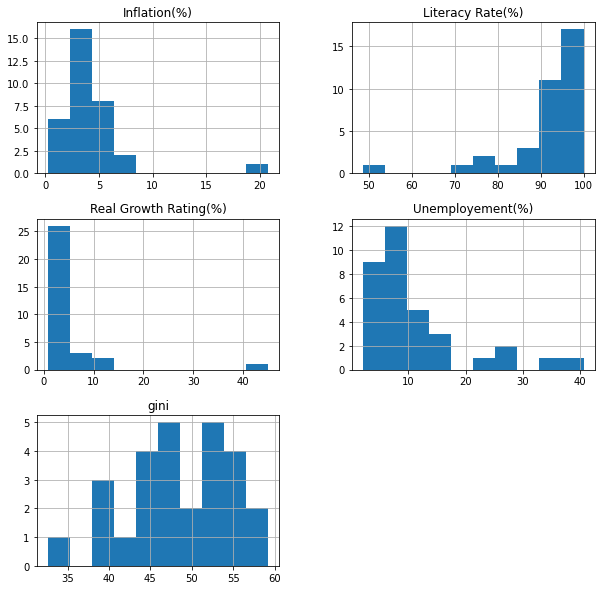

In [70]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
americas_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

In [71]:
americas_region['gini'].mean()

48.703703703703695

In [72]:
americas_region.fillna({'gini':americas_region['gini'].mean()}, inplace = True)

In [73]:
americas_region['Real Growth Rating(%)'].mode()

0    3.5
dtype: float64

In [74]:
americas_region.fillna({'Real Growth Rating(%)':americas_region['Real Growth Rating(%)'].mode().iloc[0]}, inplace = True)

In [75]:
americas_region['Literacy Rate(%)'].mode()

0    98.0
dtype: float64

In [76]:
americas_region.fillna({'Literacy Rate(%)':americas_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [77]:
americas_region['Inflation(%)'].mode()

0    2.8
dtype: float64

In [78]:
americas_region.fillna({'Inflation(%)':americas_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

In [79]:
americas_region['Unemployement(%)'].mode()

0     4.1
1     4.5
2     6.0
3    11.0
dtype: float64

In [80]:
americas_region.fillna({'Unemployement(%)':americas_region['Unemployement(%)'].mode().iloc[1]}, inplace = True)

In [81]:
americas_region.fillna({'area':0}, inplace = True)

When looking at the information of the polar region we can see that there is only one row within the dataframe and that row has multiple null values, since it would be impossible to create a distribution metric for only one value per column we will instead drop the polar region sub-dataframe altogether as its loss is of little significance.

In [82]:
print(polar_region.shape)
polar_region.info()

(1, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 8 to 8
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1 non-null      int64  
 1   name                   1 non-null      object 
 2   region                 1 non-null      object 
 3   subregion              0 non-null      object 
 4   population             1 non-null      int64  
 5   area                   1 non-null      float64
 6   gini                   0 non-null      float64
 7   Real Growth Rating(%)  0 non-null      float64
 8   Literacy Rate(%)       0 non-null      float64
 9   Inflation(%)           0 non-null      float64
 10  Unemployement(%)       0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 96.0+ bytes


In [83]:
polar_region

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
8,8,Antarctica,Polar,NaN,1000,14000000.0,NaN,NaN,NaN,NaN,NaN


<ipython-input-84-12298fd7772c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  polar_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8068BC40>,
      dtype=object)

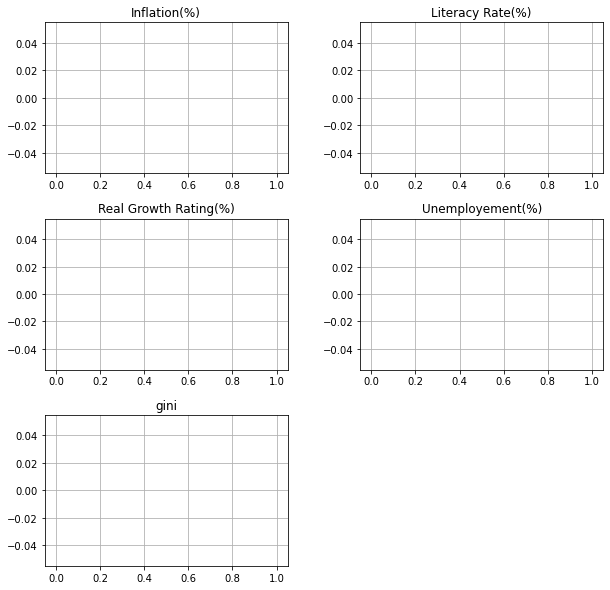

In [84]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
polar_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

We will now begin the outlier handling of each sub-dataframe by first checking for the number of outlier values in each numerical column of each dataframe. We do ths by first getting boxplot representations of each column in each sub-dataframe and counting the number of outliers in each.

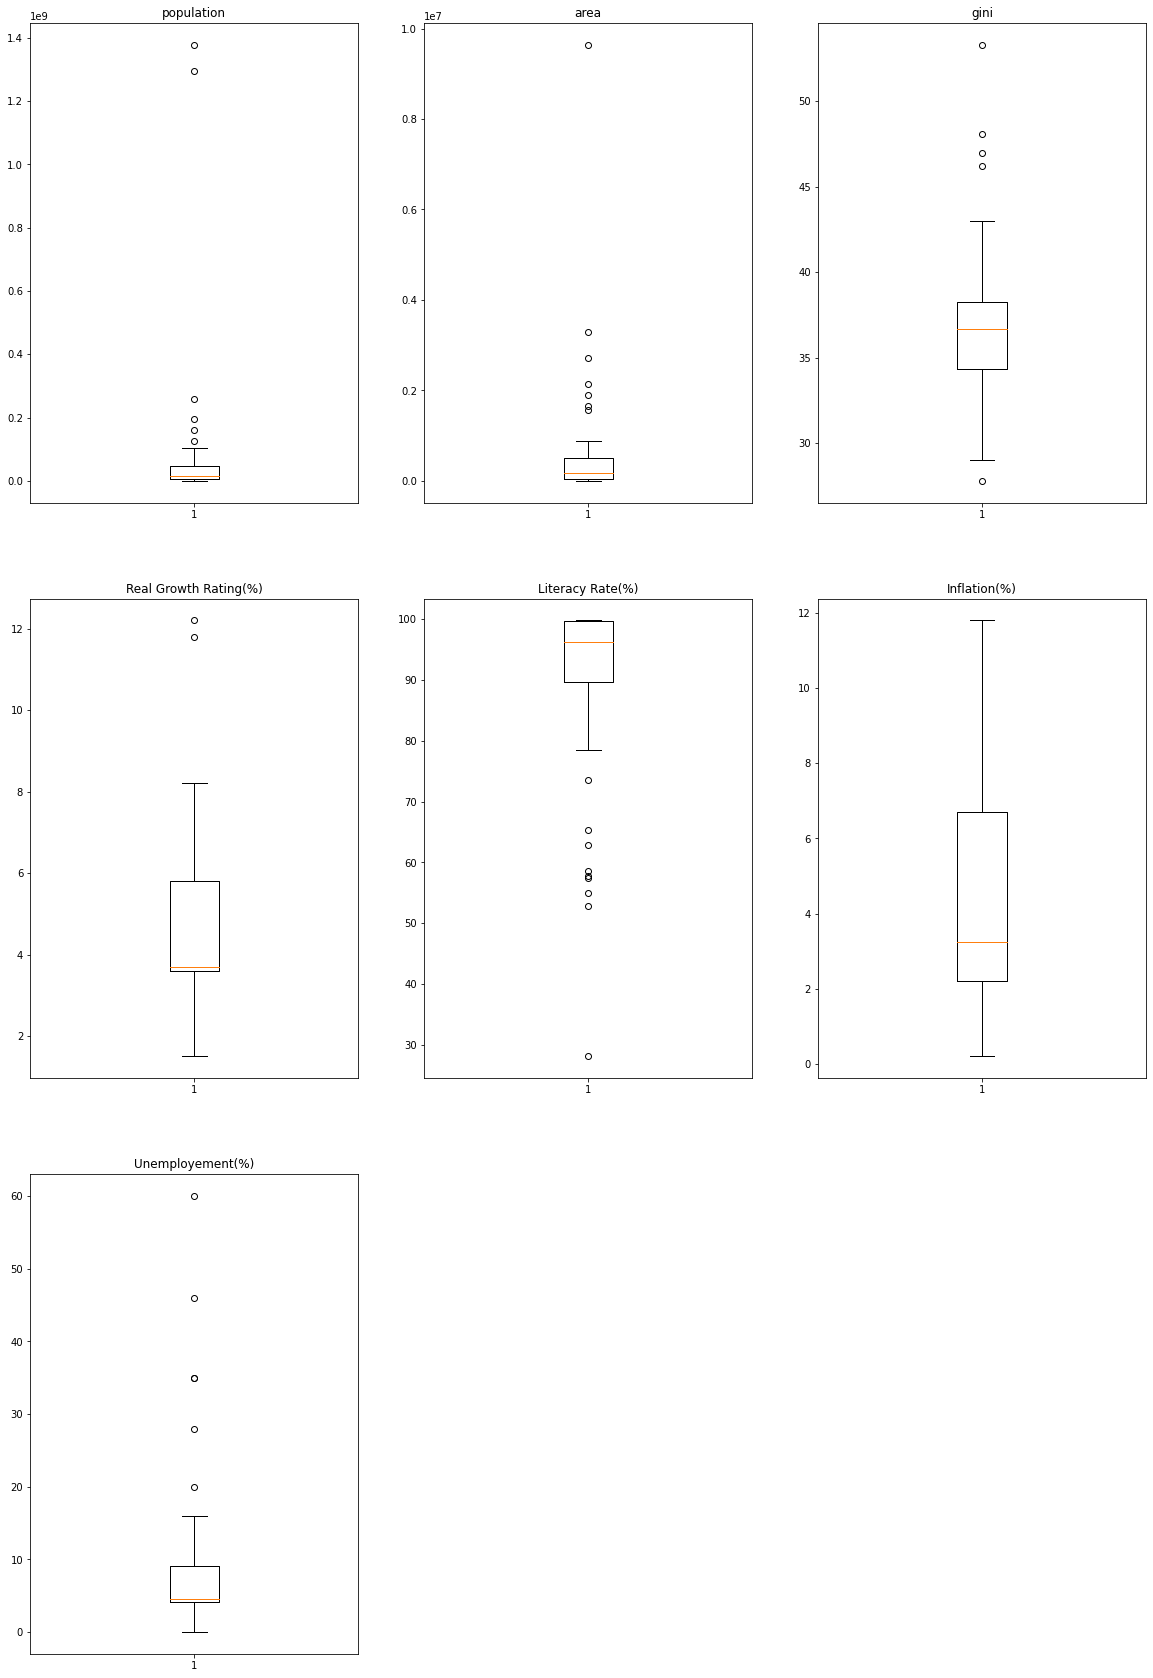

In [91]:
#df_dict = {'asia_region': 1, 'europe_region': 2, 'africa_region': 3, 'oceania_region': 4, 'americas_region': 5}
col_dict = {'population':1 , 'area':2 ,
        'gini':3 , 'Real Growth Rating(%)': 4, 'Literacy Rate(%)': 5,
       'Inflation(%)' : 6, 'Unemployement(%)': 7}

plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(asia_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [96]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(asia_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((asia_region[variable] > max_val) | (asia_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 6
Number of outliers and percentage of it in area : 7
Number of outliers and percentage of it in gini : 5
Number of outliers and percentage of it in Real Growth Rating(%) : 2
Number of outliers and percentage of it in Literacy Rate(%) : 9
Number of outliers and percentage of it in Inflation(%) : 0
Number of outliers and percentage of it in Unemployement(%) : 6


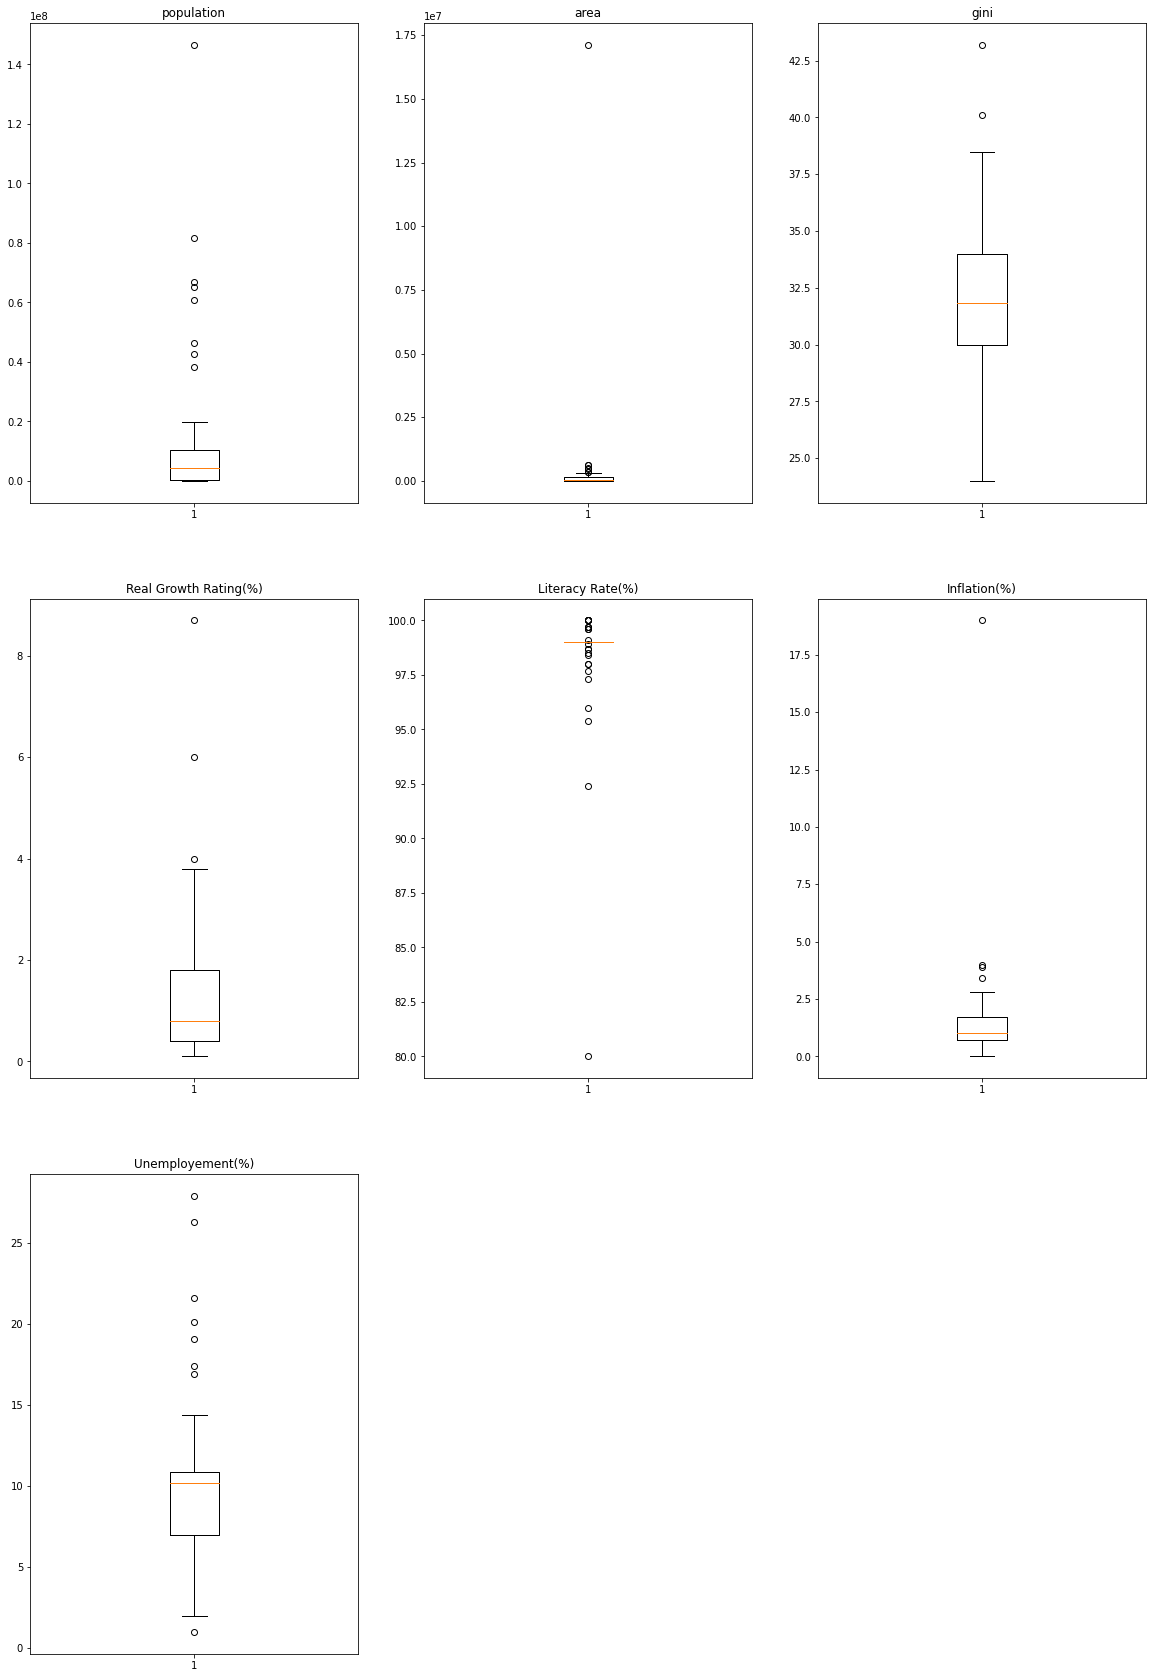

In [92]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(europe_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [97]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(europe_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((europe_region[variable] > max_val) | (europe_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 8
Number of outliers and percentage of it in area : 7
Number of outliers and percentage of it in gini : 2
Number of outliers and percentage of it in Real Growth Rating(%) : 3
Number of outliers and percentage of it in Literacy Rate(%) : 24
Number of outliers and percentage of it in Inflation(%) : 4
Number of outliers and percentage of it in Unemployement(%) : 8


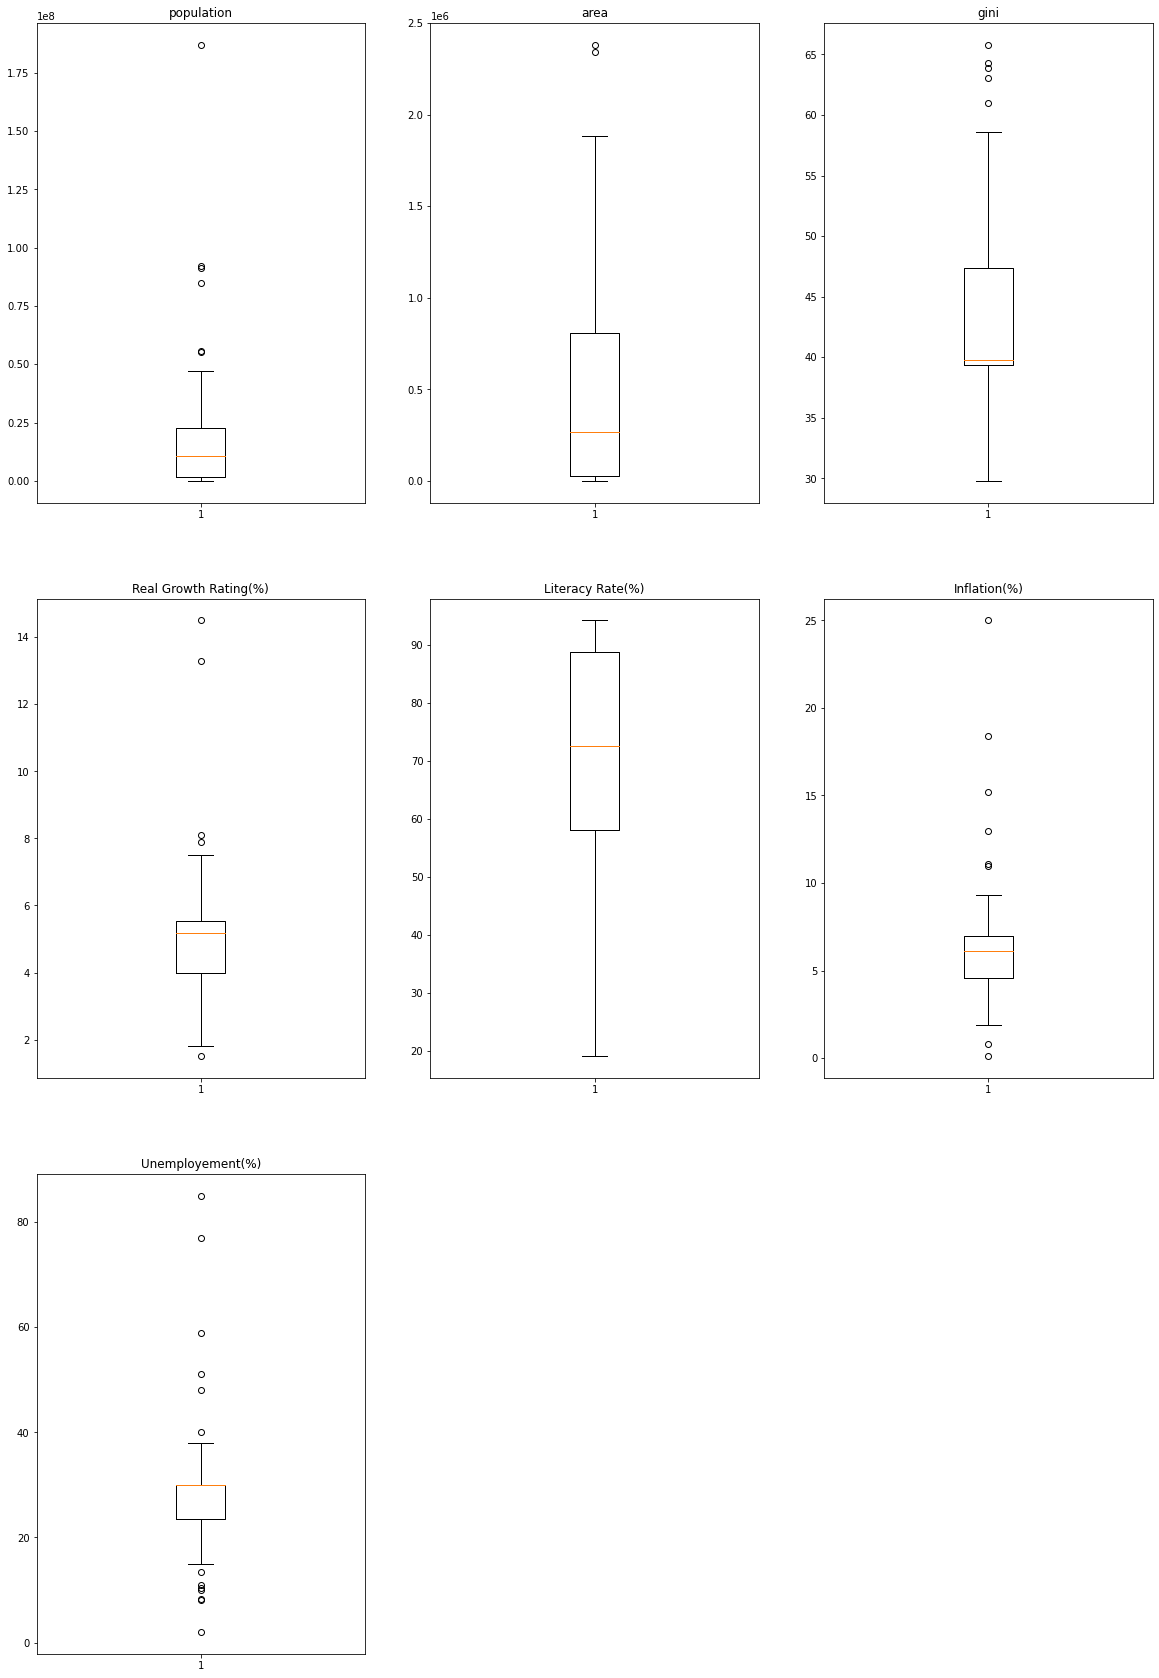

In [93]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(africa_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [98]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(africa_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((africa_region[variable] > max_val) | (africa_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 6
Number of outliers and percentage of it in area : 2
Number of outliers and percentage of it in gini : 5
Number of outliers and percentage of it in Real Growth Rating(%) : 5
Number of outliers and percentage of it in Literacy Rate(%) : 0
Number of outliers and percentage of it in Inflation(%) : 8
Number of outliers and percentage of it in Unemployement(%) : 13


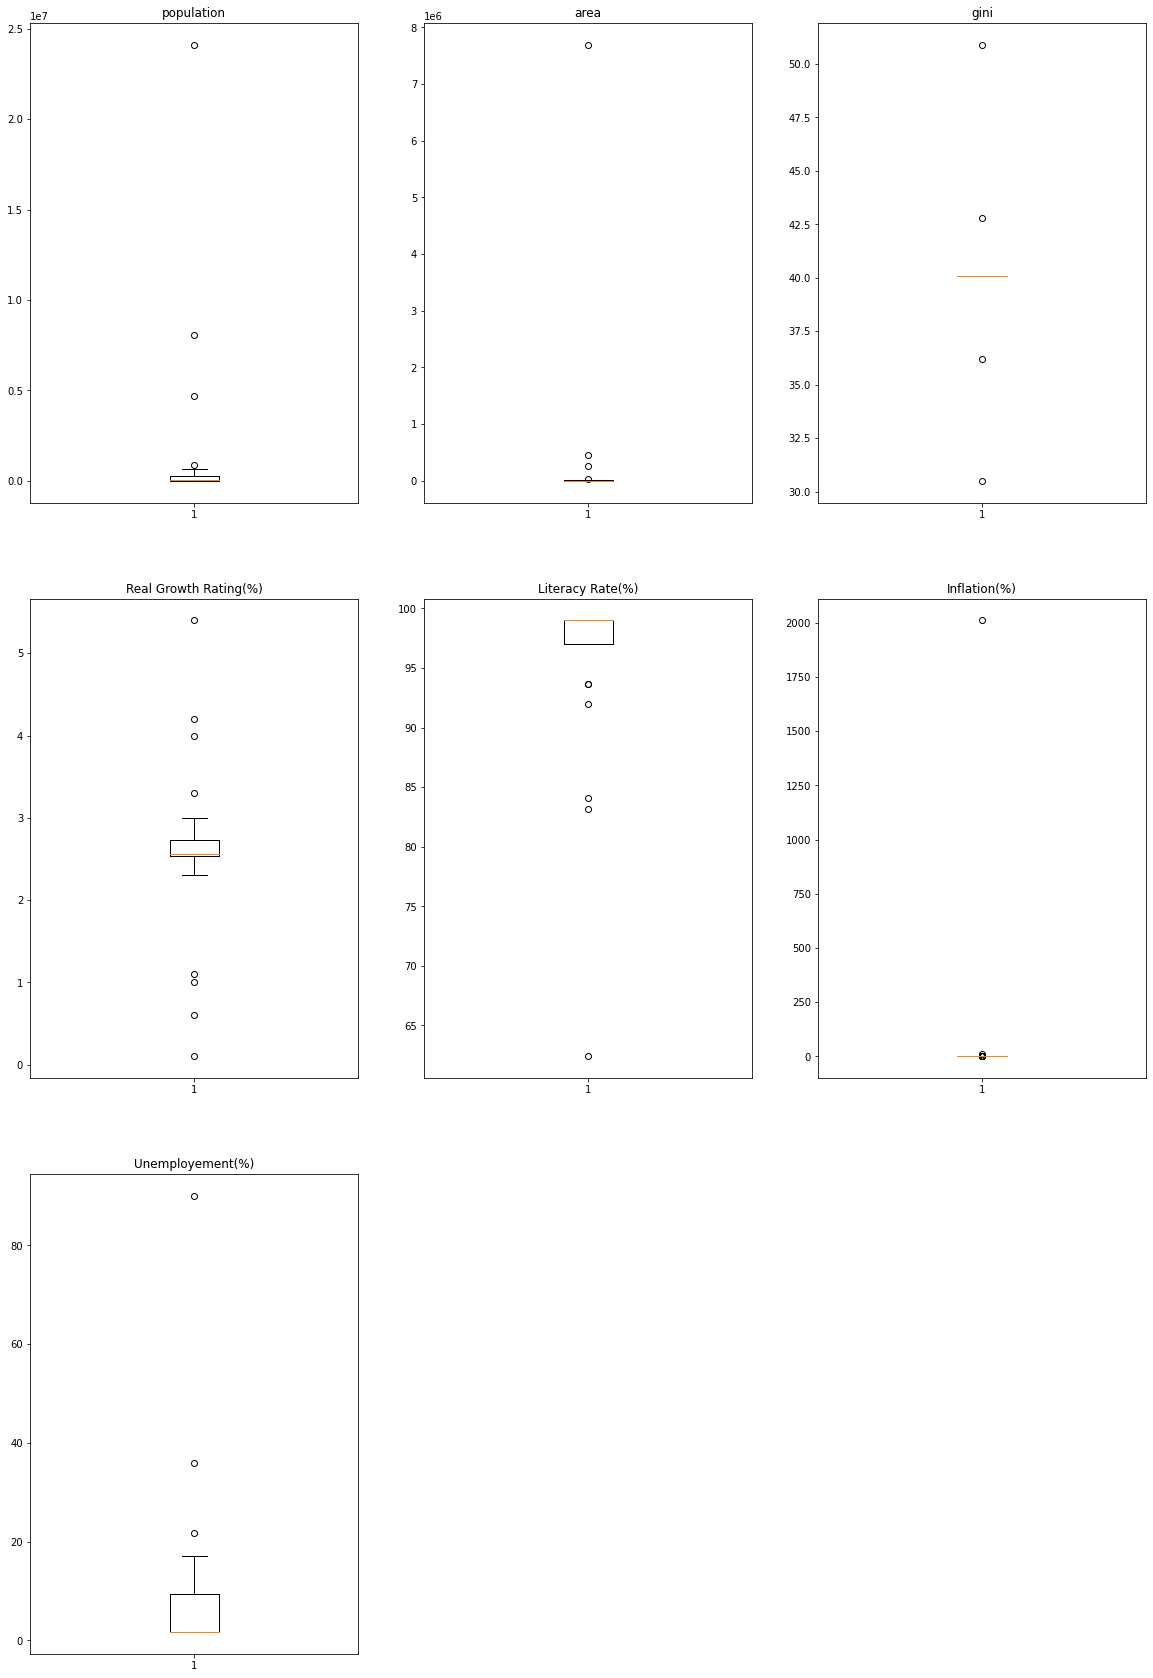

In [94]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(oceania_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [99]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(oceania_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((oceania_region[variable] > max_val) | (oceania_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 4
Number of outliers and percentage of it in area : 4
Number of outliers and percentage of it in gini : 4
Number of outliers and percentage of it in Real Growth Rating(%) : 8
Number of outliers and percentage of it in Literacy Rate(%) : 6
Number of outliers and percentage of it in Inflation(%) : 10
Number of outliers and percentage of it in Unemployement(%) : 3


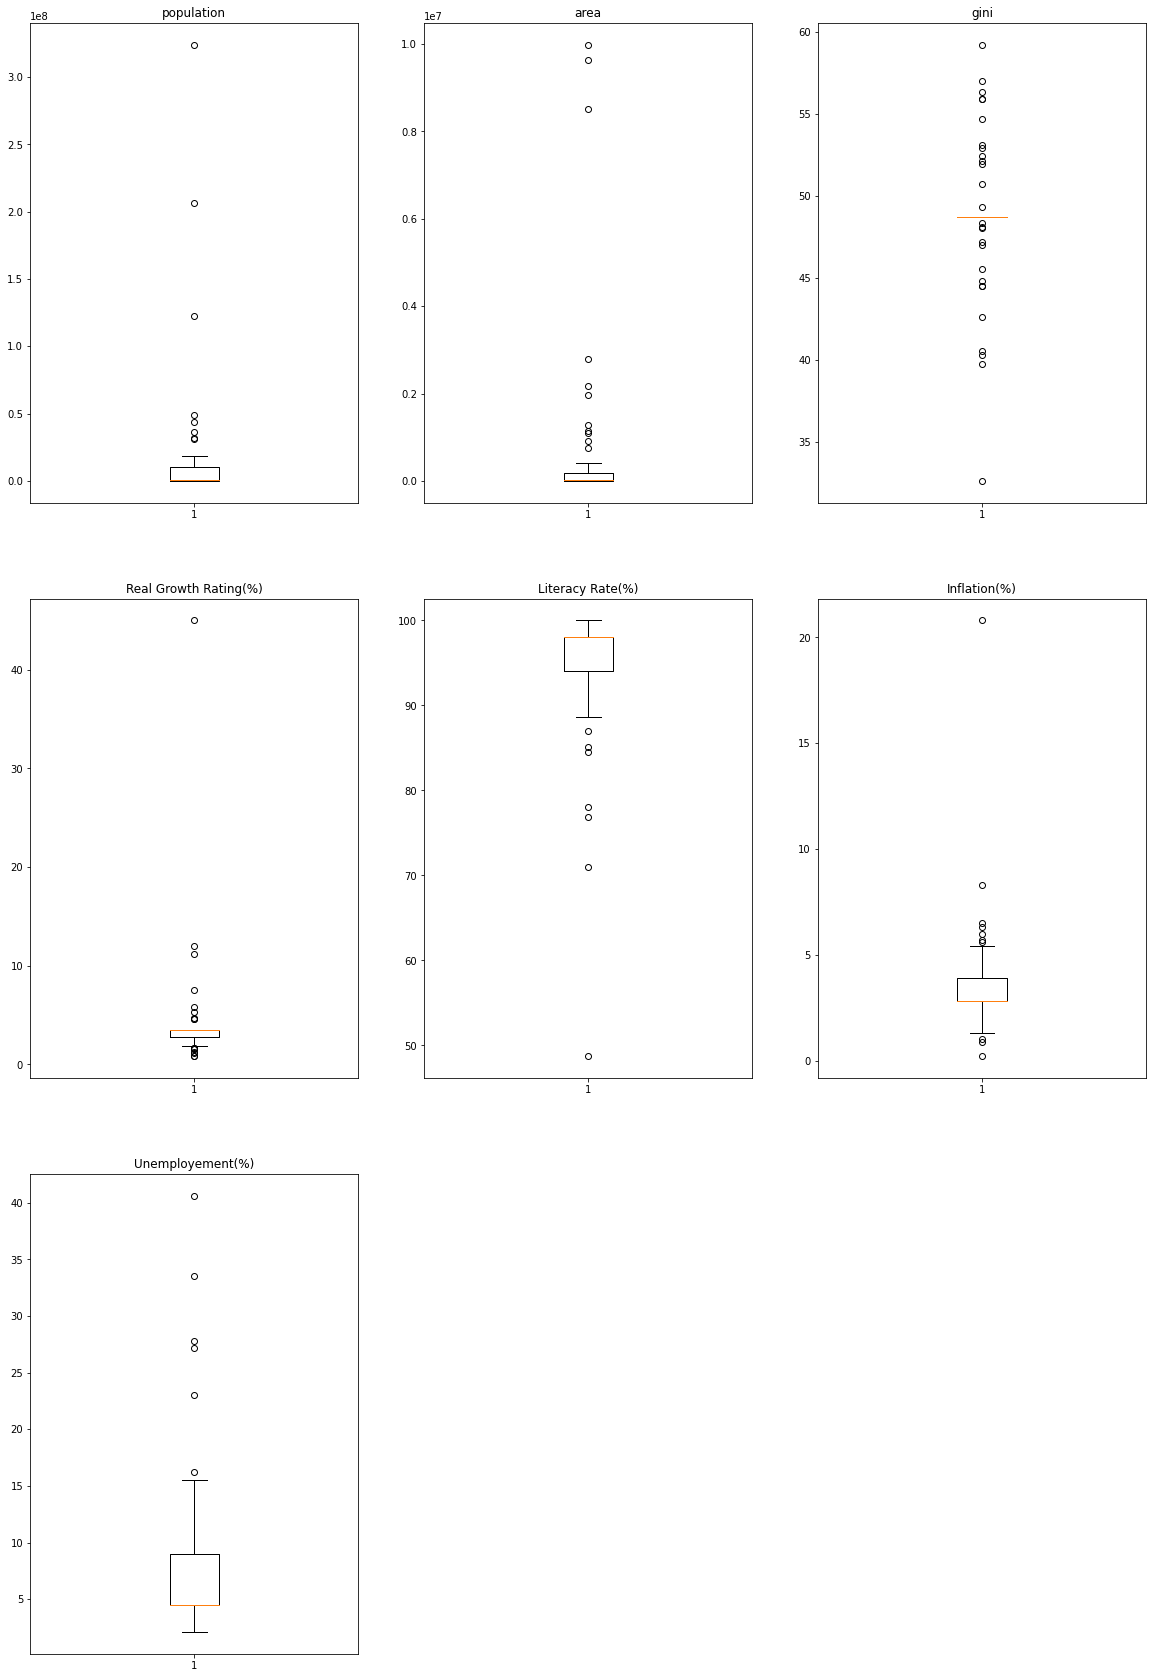

In [95]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(americas_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [100]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(americas_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((americas_region[variable] > max_val) | (americas_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 8
Number of outliers and percentage of it in area : 11
Number of outliers and percentage of it in gini : 27
Number of outliers and percentage of it in Real Growth Rating(%) : 17
Number of outliers and percentage of it in Literacy Rate(%) : 7
Number of outliers and percentage of it in Inflation(%) : 10
Number of outliers and percentage of it in Unemployement(%) : 6


We then use Winsorization to remove the effect of the outliers for each set of columns in a sub-dataframe.

In [102]:
from scipy.stats.mstats import winsorize

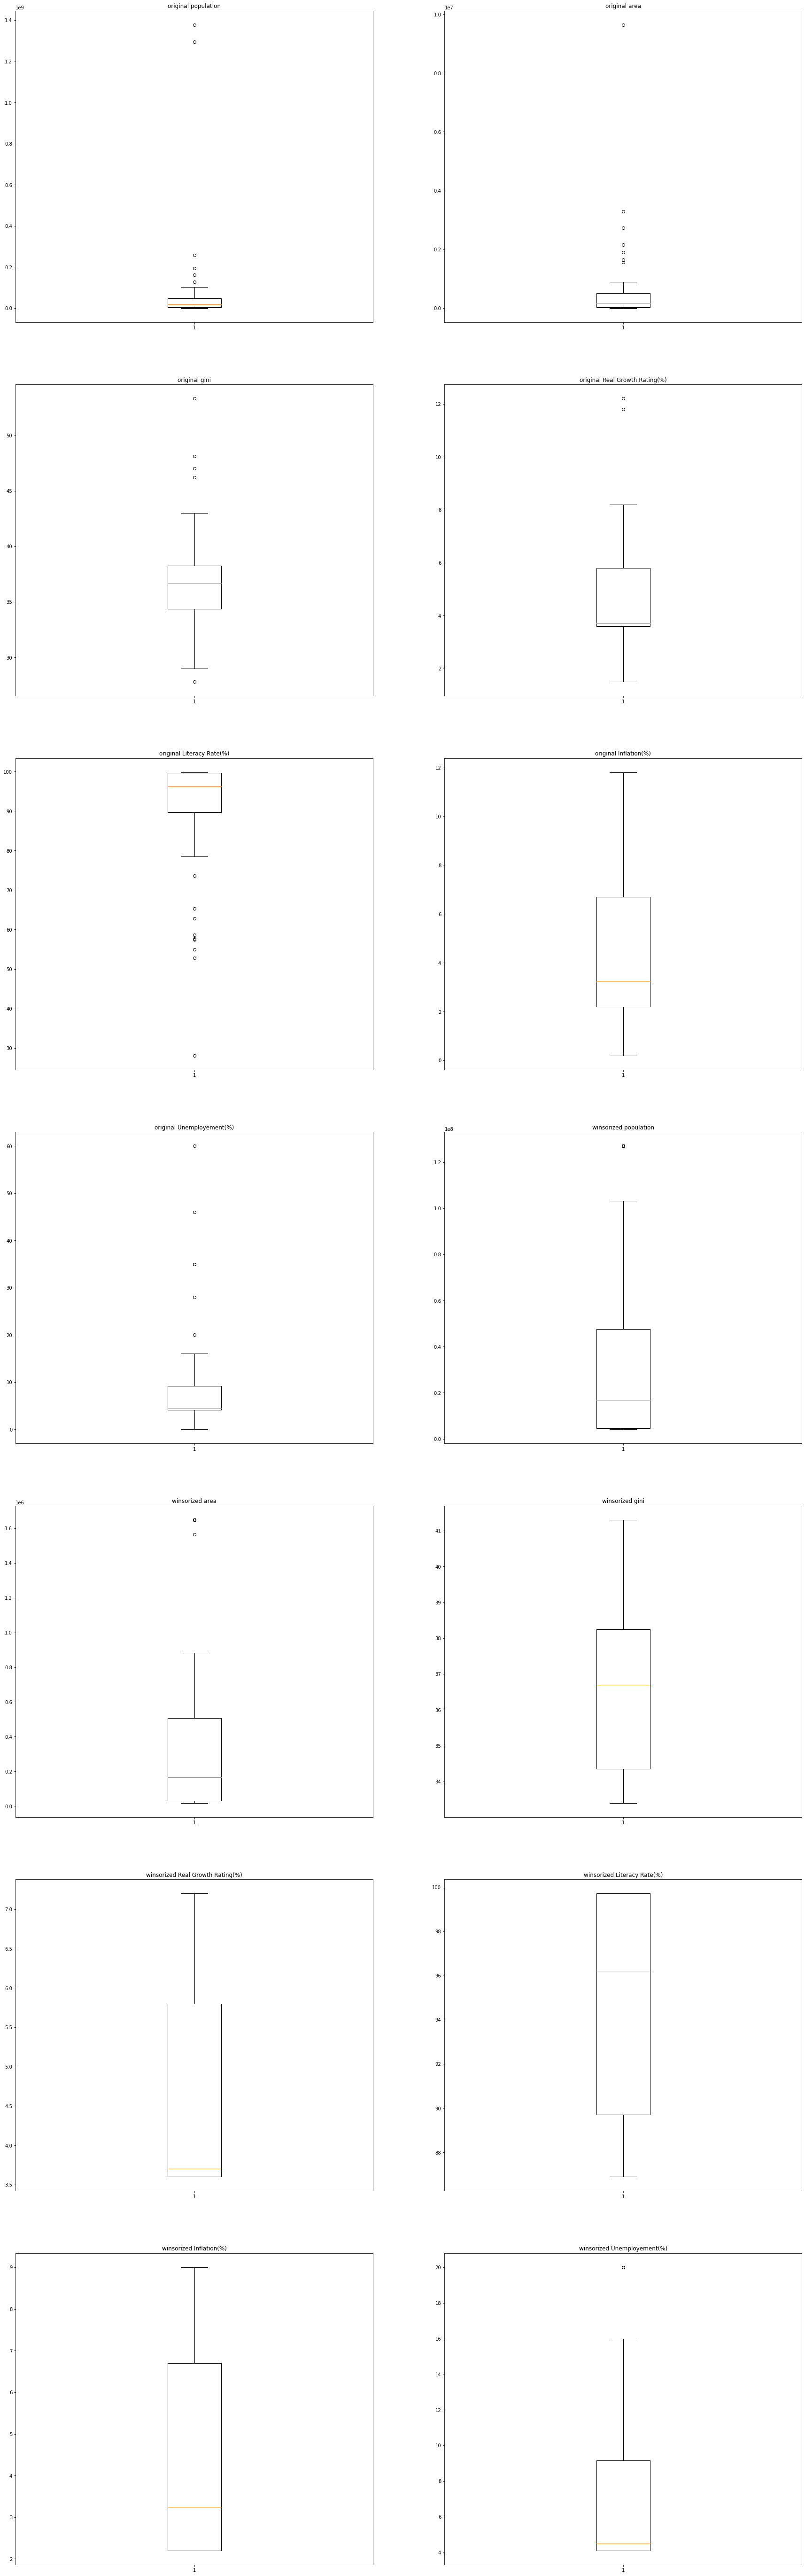

In [120]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = asia_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(asia_region[variable],(0.2,0.1))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

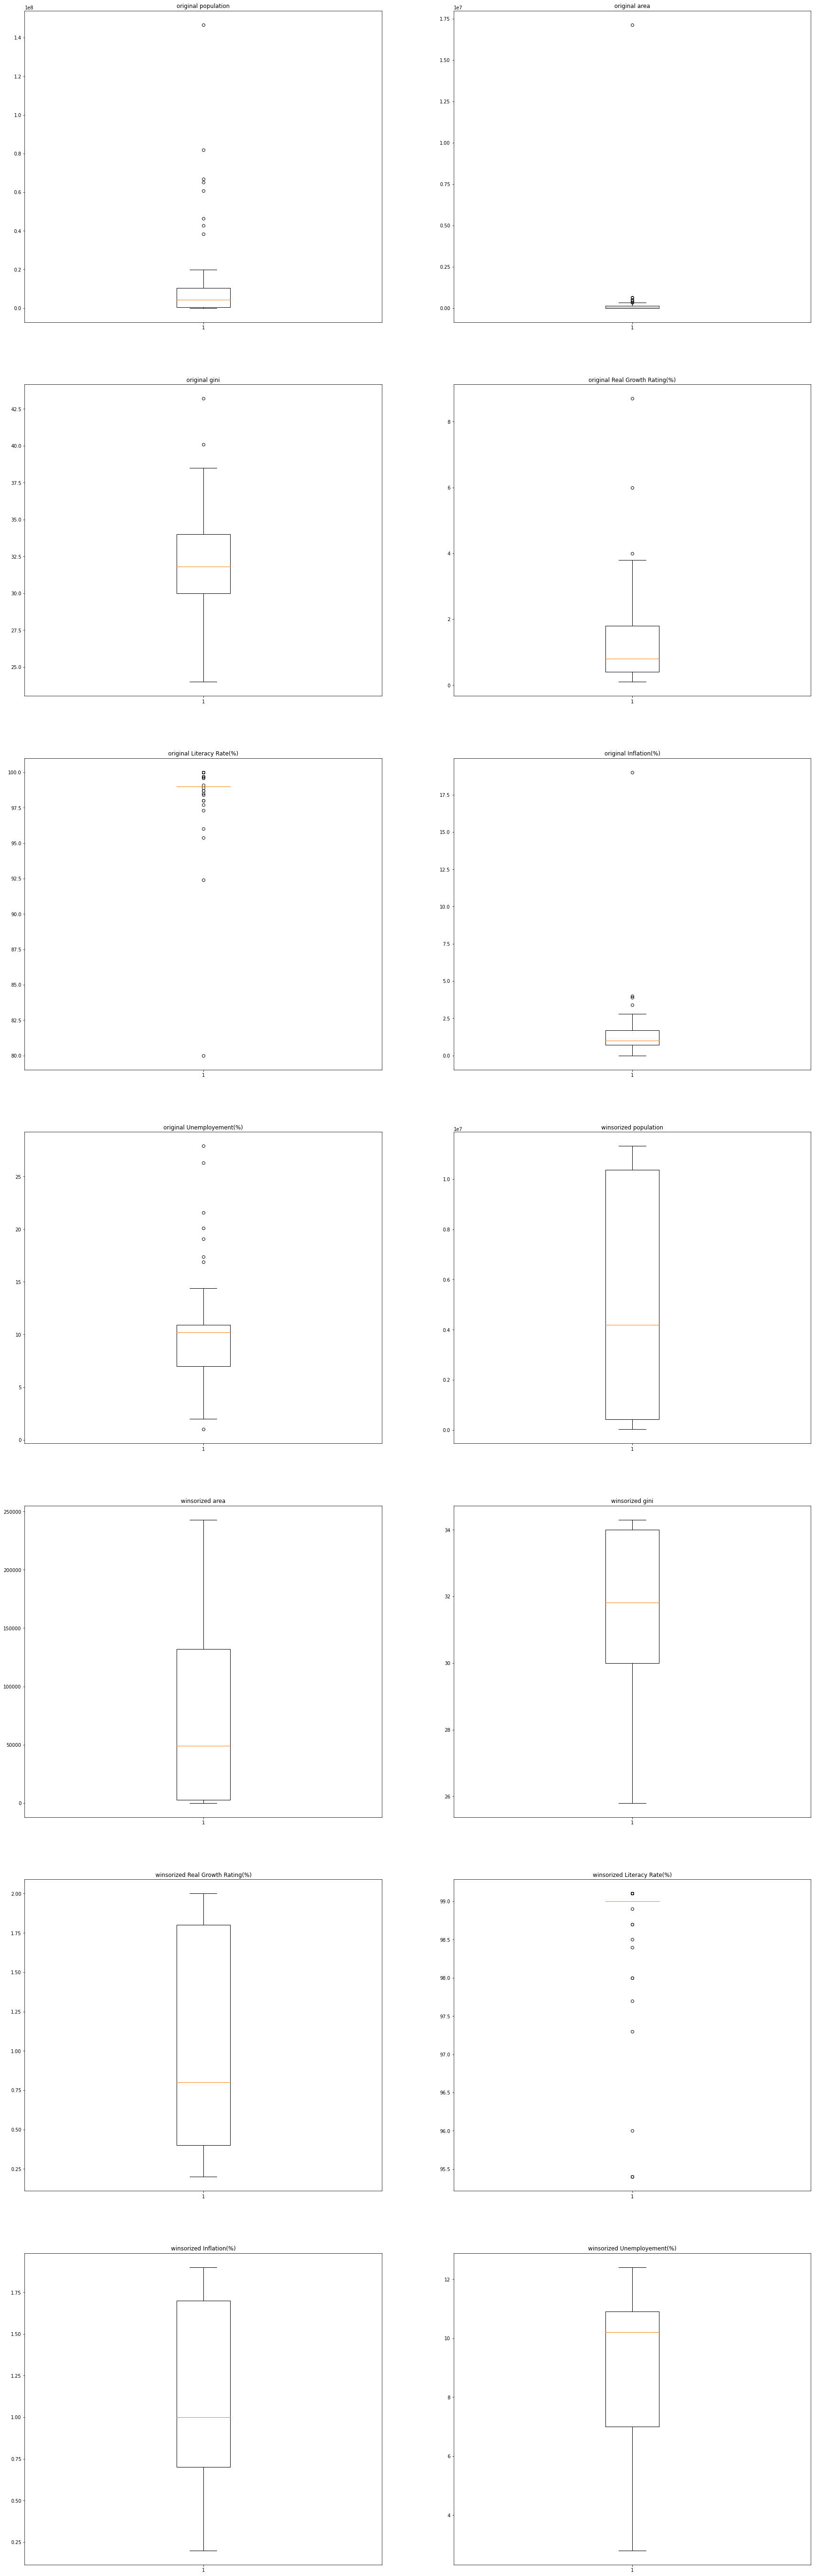

In [129]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = europe_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(europe_region[variable],(0.05,0.2))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

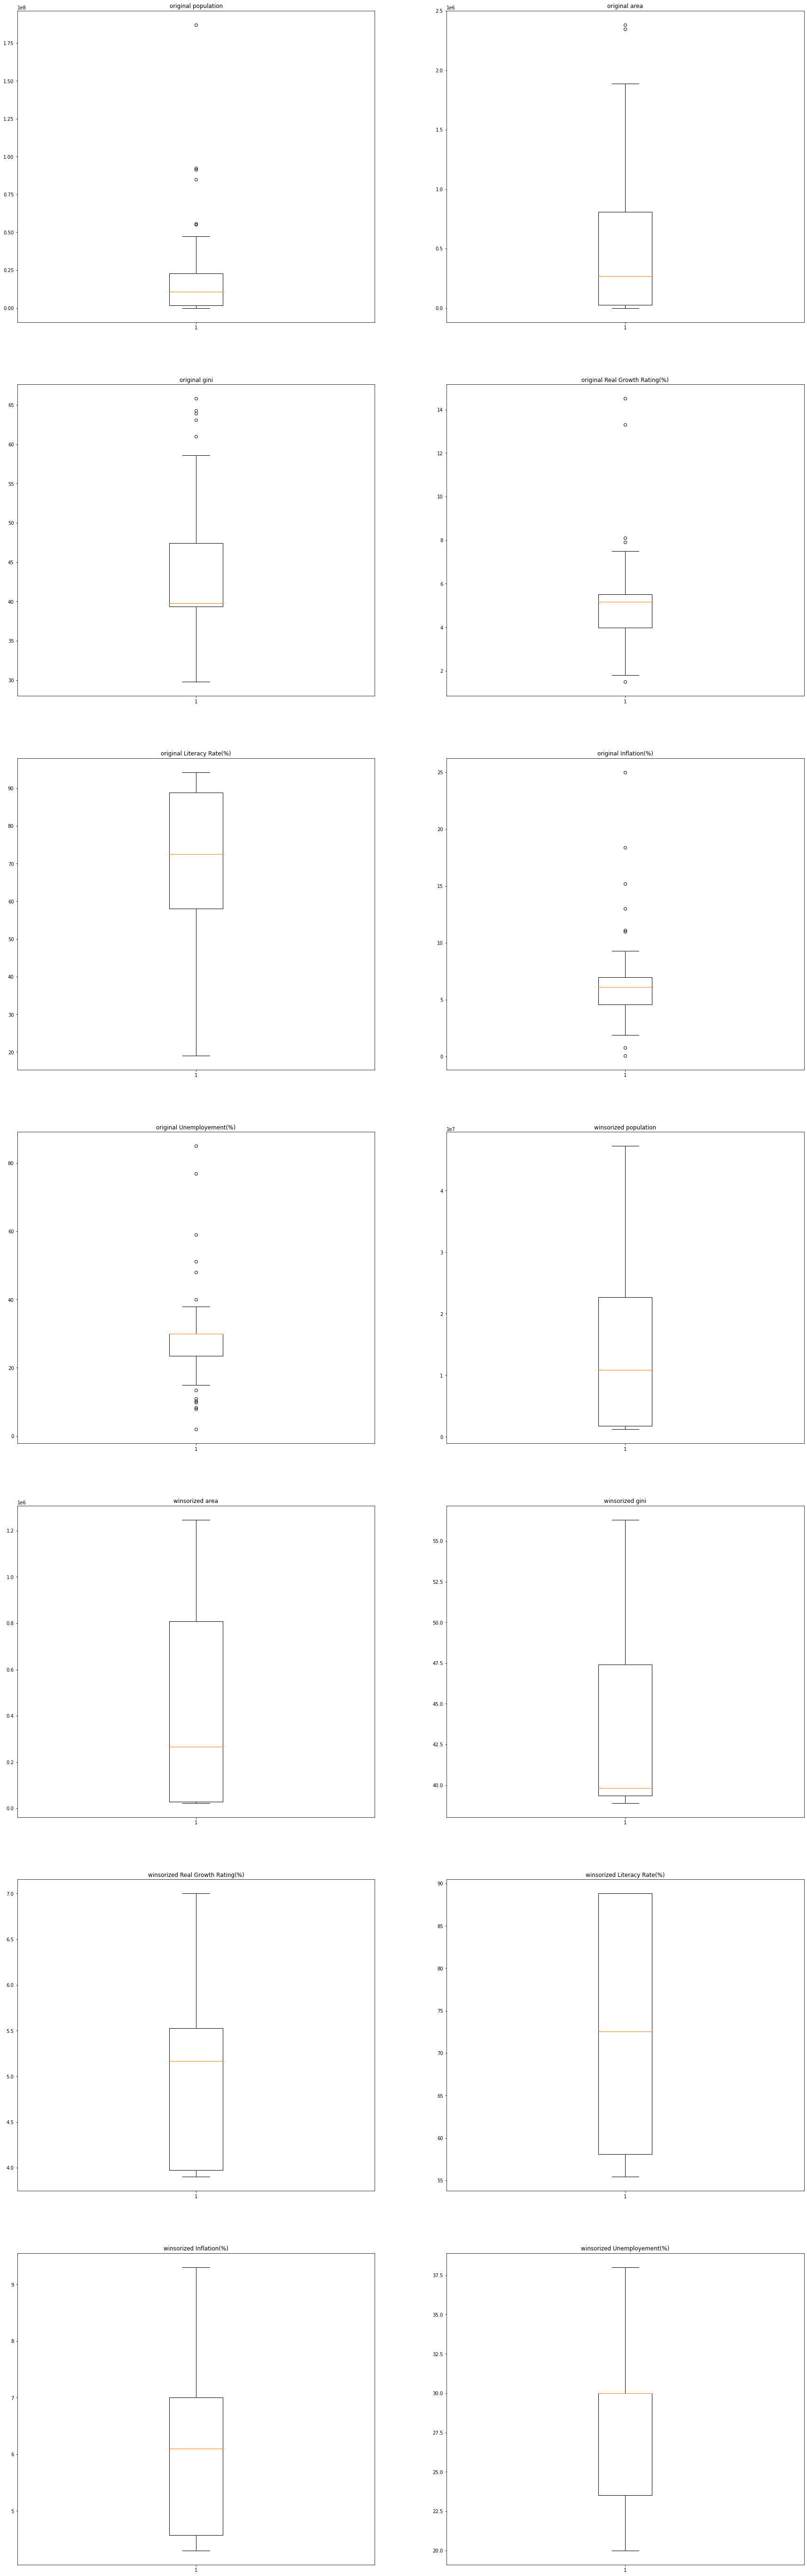

In [137]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = africa_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(africa_region[variable],(0.2,0.1))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

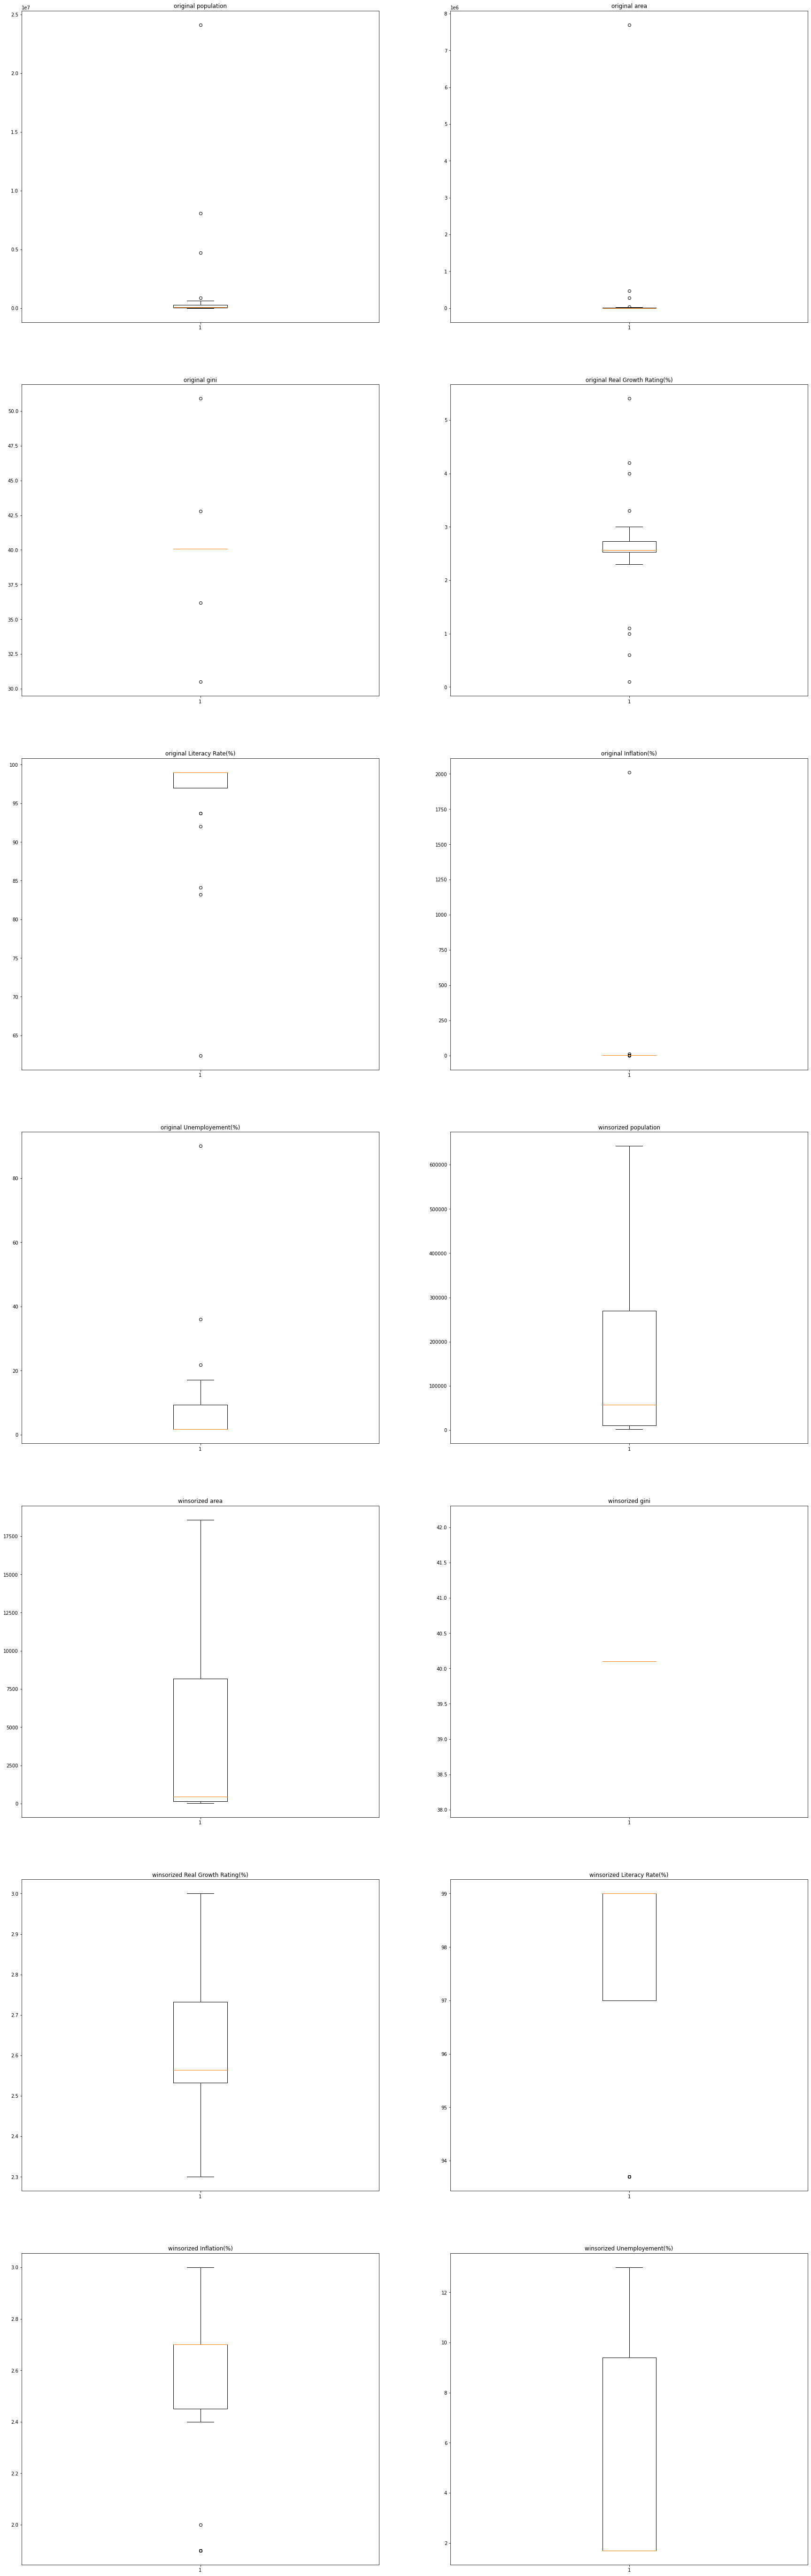

In [140]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = oceania_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(oceania_region[variable],(0.15,0.15))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

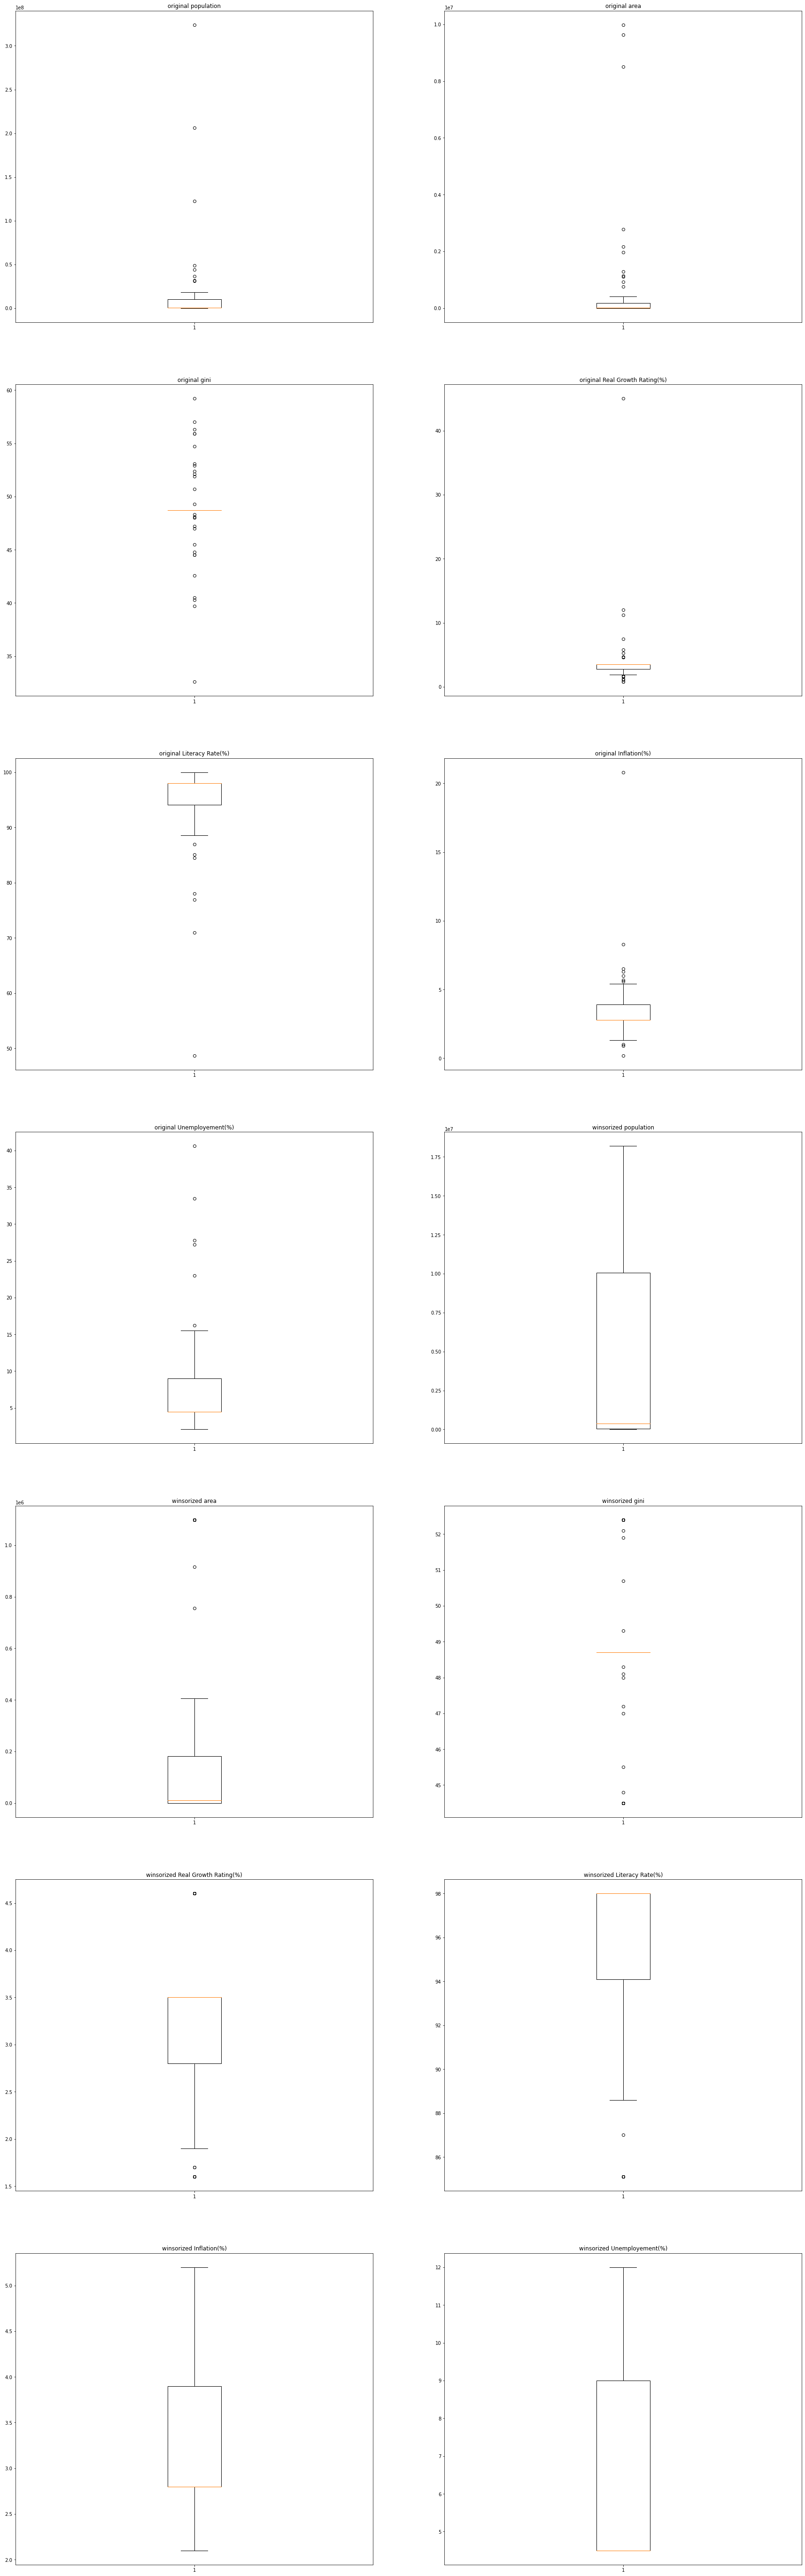

In [145]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = americas_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(americas_region[variable],(0.1,0.15))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

Now that we have reduced the number of outliers in each sub-dataframe, we can now merge all the sub-dataframes together to form a clean and tidy version of the original 250_countries datframe.

In [146]:
dataframe_set = [asia_region, europe_region, africa_region, oceania_region, americas_region]
tidy_250_countries = pd.concat(dataframe_set)

In [147]:
tidy_250_countries

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,3.1,28.1,6.8,35.0
11,11,Armenia,Asia,Western Asia,2994400,29743.0,30.900000,3.6,99.4,2.2,4.1
15,15,Azerbaijan,Asia,Western Asia,9730500,86600.0,33.700000,5.8,99.8,2.4,6.0
17,17,Bahrain,Asia,Western Asia,1404900,765.0,36.700000,3.6,99.7,2.2,4.1
18,18,Bangladesh,Asia,Southern Asia,161006790,147570.0,32.100000,5.8,57.7,7.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...
229,229,Trinidad and Tobago,Americas,Caribbean,1349667,5130.0,40.300000,1.6,98.8,5.4,5.9
233,233,Turks and Caicos Islands,Americas,Caribbean,31458,948.0,48.703704,11.2,98.0,2.5,10.0
239,239,United States of America,Americas,Northern America,323947000,9629091.0,48.000000,3.5,98.0,2.8,4.5
240,240,Uruguay,Americas,South America,3480222,181034.0,39.700000,3.5,98.1,8.3,6.5
